In [36]:
from itertools import product

import os.path

def check_setups(setups, data_path):
    return not missing_setups(setups, data_path)

def missing_setups(setups, data_path):
    missing = []
    for dim, in_edges, tau, autocorr, data_length, run in setups:
        if not os.path.isfile(data_path + f't={tau}_d={dim}_in={in_edges}_autocorr={autocorr}_{run}.pickle'):
            missing.append((dim, in_edges, tau, autocorr, data_length))#, run))
    return missing


In [ ]:

dimensions = [3, 5, 10]
incoming_edges = [2, 3, 4]
taus = [5, 10, 15, 20]
autocorrs = [False, True]
data_length = [10000]
runs = range(10)

setups = list(product(dimensions, incoming_edges, taus, autocorrs, data_length, runs))

missing = list(set(missing_setups(setups, 'icml_data/')))
missing

In [ ]:
print(f'{len(missing_setups(setups, "icml_data/"))} out of {len(setups)} missing')

In [64]:
from itertools import product
dimensions = [3, 5, 10]
incoming_edges = [2, 3, 4]
taus = [5, 10, 15, 20]
autocorrs = [False]
data_length = [10000]
runs = range(10)

setups = list(product(dimensions, incoming_edges, taus, autocorrs, data_length, runs))

Graph not stable, regenerating
Graph not stable, regenerating


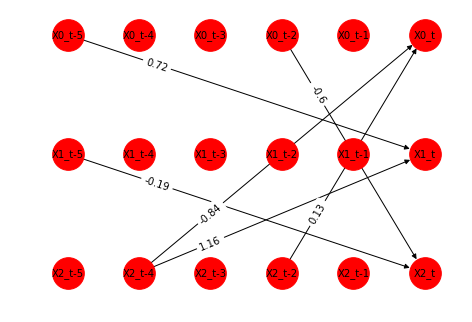

In [11]:
import os
if not os.getcwd().endswith('CIoTS'):
    os.chdir('../..')
from CIoTS import *

dim, in_edges, tau, autocorr, data_length = setups[0]
generator = CausalTSGenerator(dimensions=dim, max_p=tau, data_length=data_length,
                              incoming_edges=in_edges, autocorrelation=autocorr)
generator.generate_stable_graph()
generator.draw_graph()

In [65]:
set(missing_setups(setups, "notebooks/ICML/icml_data_no_autocorr/"))

{(5, 4, 10, False, 10000),
 (5, 4, 15, False, 10000),
 (5, 4, 20, False, 10000),
 (10, 3, 10, False, 10000),
 (10, 3, 15, False, 10000),
 (10, 3, 20, False, 10000),
 (10, 4, 5, False, 10000),
 (10, 4, 10, False, 10000),
 (10, 4, 15, False, 10000),
 (10, 4, 20, False, 10000)}

In [18]:
import sys
from subprocess import Popen, PIPE, run
for setup in setups:
    p = Popen(['python3', 'datagen.py', str(setup)])